# Lab 1: Linear Regression and Overfitting

### Machine Learning and Pattern Recognition, September 2015

* The lab exercises should be made in groups of two or three people.
* The deadline is sunday September 20, 23:59.
* Assignment should be sent to Philip Versteeg. (p.j.j.p.versteeg@uva.nl) The subject line of your email should be "\#lab\_lastname1\_lastname2\_lastname3".
* Put your and your teammates' names in the body of the email
* Attach the .IPYNB (IPython Notebook) file containing your code and answers. Naming of the file follows the same rule as the subject line. For example, if the subject line is "lab01\_Kingma\_Hu", the attached file should be "lab01\_Kingma\_Hu.ipynb". Only use underscores ("\_") to connect names, otherwise the files cannot be parsed.
* Make sure we can run your notebook / scripts!

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact me.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.

In [7]:
%pylab inline
#import numpy as np
#import matplotlib as plt
#random.seed(42)

Populating the interactive namespace from numpy and matplotlib


$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

### 1.1. Generate sinusoidal data (5 points)
Write a method `gen_sinusoidal(N)` that generates toy data like in fig 1.2 of the MLPR book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = sin(x_i)$ and the standard deviation $\sigma = 0.2$.


In [10]:
# 1.1
def gen_sinusoidal(N):
    from random import gauss
    sigma = 0.2
    x = np.linspace(0, 2*np.pi, N)
    t = []
    for i in range(N):
        t.append(gauss(mu=np.sin(x[i]), sigma=sigma))
    return (x,np.asarray(t))

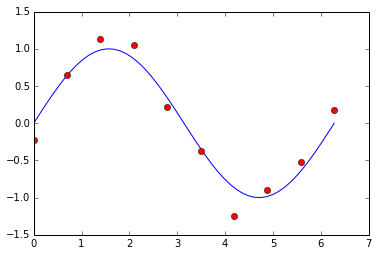

In [11]:
# visualize 1.1
# x resolution for all following plots
x = np.linspace(0, 2*pi, 50)
# true sinus function
y = np.sin(x)
X,t = gen_sinusoidal(10)
#axes([0, -1.5, 7, 3])
plot(x,y)
plot(X, t, 'o', color='red')

### 1.2 Polynomial regression (15 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in the MLPR book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [12]:
# 1.2
def fit_polynomial(x, t, M):
    # initialize design matrix Phi
    Phi = zeros((N,M+1))
    # compute Phi values (see formula above)
    for n in range(N):
        for m in range(M+1):
            Phi[n,m] = x[n]**m
    # typecast to matrix so we can do matrix multiplication
    Phi = matrix(Phi)
    # vectors are horizontal by default, so we have to transpose t
    t = matrix(t).T
    # compute model parameters (see formula above)
    w = linalg.inv(Phi.T * Phi) * (Phi.T * t)
    return w

### 1.3 Plot (5 points)
Sample a dataset with $N=9$, and fit four polynomials with $M \in (0, 1, 3, 9)$.
For each value of $M$, plot the prediction function, along with the data and the original sine function. The resulting figure should look similar to fig 1.4 of the MLPR book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

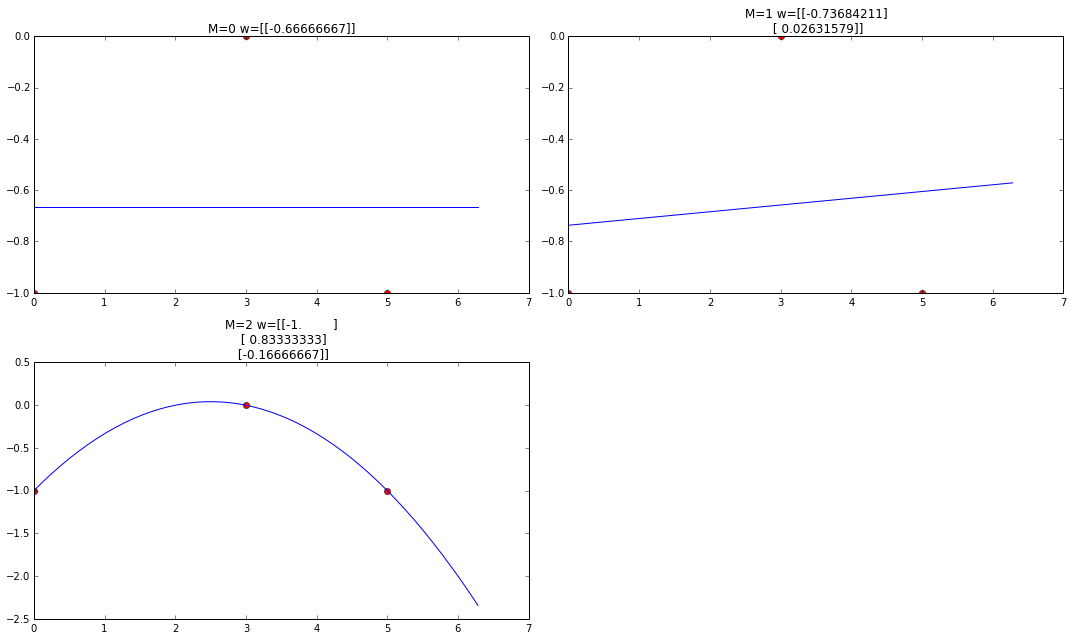

In [13]:
N = 3
# X,t = gen_sinusoidal(N)
X = np.array([0, 5, 3])
t = np.array([-1, -1, 0])
# set figsize
figure(figsize=(15,9), dpi=72)
# print "X=" + str(X)
# fit different degrees of model complexity
M = [0, 1, 2]
for i,m in enumerate(M):
    w = fit_polynomial(X, t, m)
    #print "M=" + str(m) + "; w=" + str(w)
    subplot(ceil(sqrt(len(M))), ceil(sqrt(len(M))), i+1)
    title("M="+str(m)+" w="+str(w))
    # plot data points
    plot(X, t, 'o', color='red')
    # y = w0x^0 + w1x^1 + w2x^2 ...
    fy = [sum([w[j] * (xi**j) for j in range(m+1)]) for xi in x]
    # plot fitted polynomial, x is still the linspace defined above
    plot(x, fy, color='blue')
tight_layout()
show()

### 1.4 Regularized linear regression (10 points)

Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the sinusoidal data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of the MLPR book.

In [18]:
def fit_polynomial_reg(x, t, M, lamb):
    I = matrix(identity(M+1))
    NN = len(x)
    # initialize design matrix Phi
    Phi = zeros((NN,M+1))
    # compute Phi values (see formula above)
    for n in range(NN):
        for m in range(M+1):
            Phi[n,m] = x[n]**m
    # typecast to matrix so we can do matrix multiplication
    Phi = matrix(Phi)
    # vectors are horizontal by default, so we have to transpose t
    t = matrix(t).T
    # compute model parameters (see formula above)
    w = linalg.inv((lamb * I)+ (Phi.T * Phi)) * (Phi.T * t)
    return w

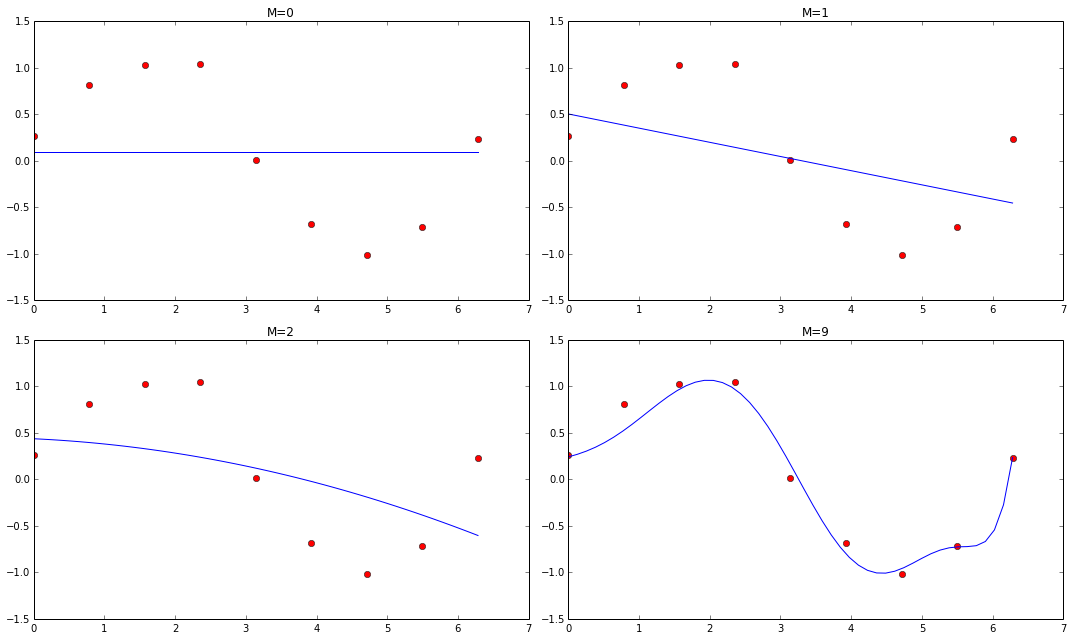

In [19]:
# number of data points
N = 9
# regularization parameter
l = 1.5
X,t = gen_sinusoidal(N)
# set figsize
figure(figsize=(15,9), dpi=72)
# print "X=" + str(X)
# fit different degrees of model complexity
M = [0, 1, 2, 9]
for i,m in enumerate(M):
    w = fit_polynomial_reg(X, t, m, lamb=l)
    #print "M=" + str(m) + "; w=" + str(w)
    subplot(ceil(sqrt(len(M))), ceil(sqrt(len(M))), i+1)
    title("M="+str(m))
    # plot data points
    plot(X, t, 'o', color='red')
    # y = w0x^0 + w1x^1 + w2x^2 ...
    fy = [sum([w[j] * (xi**j) for j in range(m+1)]) for xi in x]
    # plot fitted polynomial, x is still the linspace defined above
    plot(x, fy, color='blue')
tight_layout()
show()






### 1.5 Model selection by cross-validation (10 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=9$ datapoints generated with `gen_sinusoidal(9)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you can use $K=9$ folds, corresponding to _leave-one-out_ crossvalidation.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

To get you started, here's a method you can use to generate indices of cross-validation folds.

In [16]:
def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = np.floor(np.linspace(0,N,k+1))
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds


In [20]:
X,t = gen_sinusoidal(N)
train, valid = kfold_indices(N,N)
#print "X: " + str((X))
#print "t: " + str((t))
#print "training sets: " + str(train)
#print "validation sets: " + str(valid)

M = range(0,11)
L = np.exp(range(-10,1))
m_error = []
for m in M:
    l_error = []
    for l in L:
        cv_error = []
        for i,tr in enumerate(train):
            #print "fit model on training set " + str(i) + ": " + str(tr) + " with parameters M=" + str(m) + " and lambda=" + str(l)
            w = fit_polynomial_reg(X[tr], t[tr], m, l)
            #print "predicting cross validation set " + str(i) + ": " + str(valid[i])
            prediction = [sum([w[j] * (xi**j) for j in range(m+1)]) for xi in X[valid[i]]]
            pred_error = np.power(t[valid[i]] - prediction, 2)
            #print "predicting cross validation set " + str(i) + ": " + str(valid[i]) + " - Prediction error = " + str(pred_error)
            cv_error.append(pred_error)
        # average cv error for this lambda
        l_error.append(mean(cv_error))
    # prediciton errors for this M
    m_error.append(l_error)
m_error = np.asarray(m_error)
#print m_error
#print np.where(m_error == m_error.min())

Create a comprehensible plot of the cross-validation error for each choice of $M$ and $\lambda$. Highlight the best choice. 

_Question_: Explain over-fitting and underfitting, illuminated by your plot. Explain the relationship with model bias and model variance.

Answer: Over-fitting means the model is perfectly fitted to the training data but also to its noise. New test data can not be predicted accurately. An overfitted model can completely miss the true function. See plots for M>7.

Underfitting on the other hand does not take all the variances of the true function into account and thus an underfitted model can not represent the full complexity of the true function.

Model bias and model variance are defined over several data sets. Model bias is the difference between the average model fit of several fitting functions and the original function that generated the data. Model variance is the variation between the individual fitting functions from their average over all data sets. Finding the best model is a trade-off between the two. Low bias means high variance and high bias means low variance.

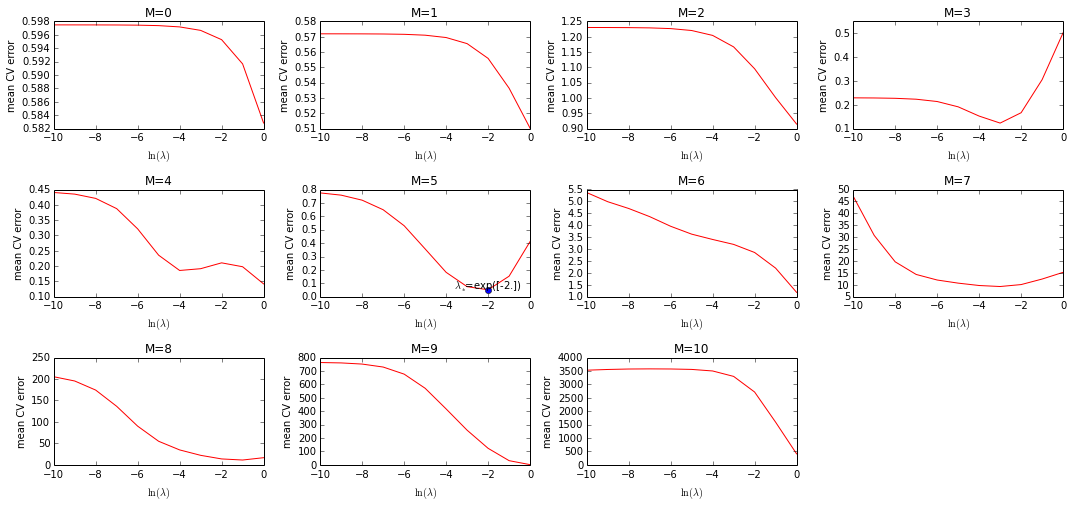

In [21]:
best = np.where(m_error == m_error.min())
# set figsize
figure(figsize=(15,9), dpi=72)
for i,m in enumerate(M):
    subplot(ceil(sqrt(len(M))), ceil(sqrt(len(M))), i+1)
    title("M="+str(m))
    plot(np.log(L), m_error[i], color='red')
    if (i == M[best[0]]):
        plot(np.log(L[best[1]]), m_error[best], 'o', color='blue')
        text(np.log(L[best[1]]), m_error[best]*1.1, "$\lambda_*$=exp("+str(np.log(L[best[1]]))+")", ha="center")
    xlabel("$\ln(\lambda)$")
    ylabel("mean CV error")
tight_layout()
show()

### 1.6 Plot best cross-validated fit (5 points)

For some dataset with $N = 9$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. Let the plot make clear which $M$ and $\lambda$ were found.

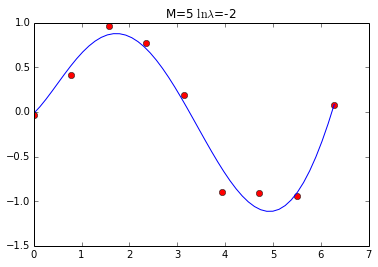

In [23]:
m = int(M[best[0]])
l = float(L[best[1]])
#print (m,l)
w = fit_polynomial_reg(X, t, m, lamb=l)
#print "M=" + str(m) + "; w=" + str(w)
title("M="+str(m)+" $\ln \lambda$="+str(int(np.log(l))))
# plot data points
plot(X, t, 'o', color='red')
# y = w0x^0 + w1x^1 + w2x^2 ...
fy = [sum([w[j] * (xi**j) for j in range(m+1)]) for xi in x]
# plot fitted polynomial, x is still the linspace defined above
plot(x, fy, color='blue')

## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Sinusoidal data 2 (5 points)

Write a function `gen_sinusoidal2(N)` that behaves identically to `gen_sinusoidal(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

In [28]:
def gen_sinusoidal2(N):
    from random import gauss
    sigma = 0.2
    x = np.random.uniform(0, 2*np.pi, N)
    t = []
    for i in range(N):
        t.append(gauss(mu=np.sin(x[i]), sigma=sigma))
    return (x,np.asarray(t))

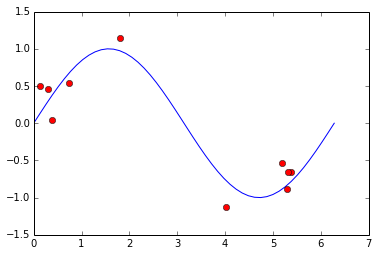

In [29]:
# x resolution for all following plots
x = np.linspace(0, 2*pi, 50)
# true sinus function
y = np.sin(x)
X2,t2 = gen_sinusoidal2(10)
#axes([0, -1.5, 7, 3])
plot(x,y)
plot(X2, t2, 'o', color='red')

### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the sinusoidal data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial, given a dataset, where `x`, `t` and `M` have the same meaning as in question 1.2.

In [41]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    I = matrix(identity(M+1))
    NN = len(x)
    # initialize design matrix Phi
    Phi = zeros((NN,M+1))
    # compute Phi values (see formula above)
    for n in range(NN):
        for m in range(M+1):
            # m-th order polynomial
            Phi[n,m] = x[n]**m
    # typecast to matrix so we can do matrix multiplication
    Phi = matrix(Phi)
    t = matrix(t).T
    S_N = linalg.inv((np.multiply(alpha, I) + np.multiply(beta, Phi.T*Phi)))
    m_N = np.multiply(beta, S_N) * Phi.T * t
    return matrix(S_N), matrix(m_N)

### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean and variance given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [44]:
def predict_polynomial_bayes(x, m, S, beta):
    # phi_j(x) * x^j
    phi_x = matrix([(x**j) for j in range(len(m+1))])
    mean = phi_x * m
    variance = np.add((1.0/beta), phi_x * S * phi_x.T)
    return mean, variance

### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 7 datapoints with `gen_sinusoidal2(7)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=5$, $\alpha=\frac{1}{2}$ and $\beta=\frac{1}{0.2^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and a 1-sigma predictive variance using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.

b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 5-th order polynomial regression. 
Display each of these 100 polynomials.

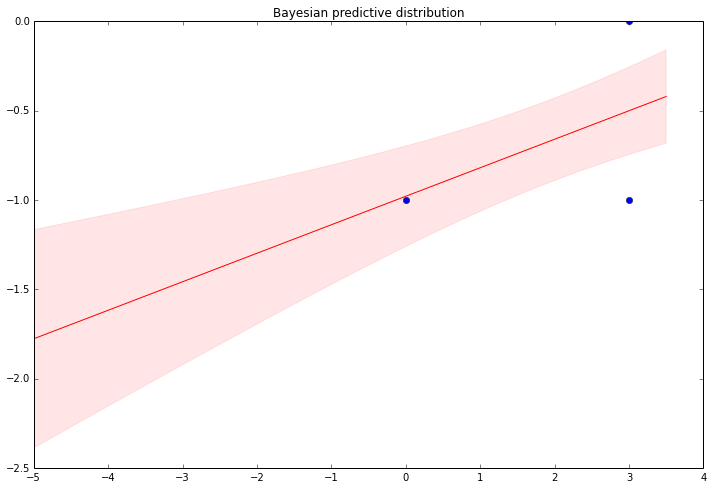

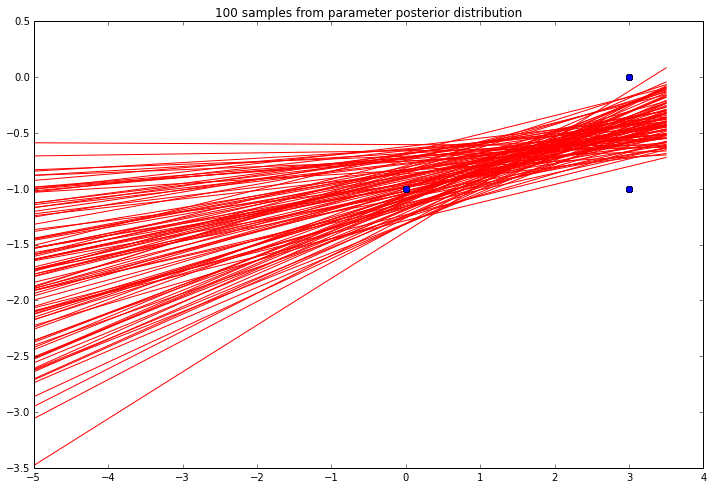

In [45]:
# a)
#X2, t2 = gen_sinusoidal2(9)
X2 = np.array([0, 3, 3])
t2 = np.array([-1, -1, 0])
alpha = 0.5
beta=(0.2**-2)
M = 1
S, m = fit_polynomial_bayes(X2, t2, M=M, alpha=alpha, beta=beta)
# x resolution for all following plots
x = np.linspace(-5, 3.5, 50)
# true sinus function
y = np.sin(x)
plt.figure(num=0, figsize=(12,8))
title("Bayesian predictive distribution")
#axes([-3, -5, 7, 3])
#plot(x,y, color="green")
# Bayesian predictions for all values on the x axis
y_fit = []
var = []
for xi in x:
    #print "predicting mean and variance for x=" + str(xi)
    mean, v = predict_polynomial_bayes(xi, m, S, beta)
    #print mean
    y_fit.append(np.asscalar(mean))
    var.append(np.asscalar(v))
#print y_fit
#print var
plot(x,y_fit, color="red")
y_fill_low = [y_fit[i] - np.sqrt(var[i]) for i in range(len(x+1))]
y_fill_high = [y_fit[i] + np.sqrt(var[i]) for i in range(len(x+1))]
fill_between(x, y_fill_low, y_fill_high, color="red", alpha=0.1)
# original data
plot(X2, t2, 'o', color='blue')

# b)
# plot posterior distribution
# get parameters for 100 samples
par = np.random.multivariate_normal(list(m.flat), S, 100)
plt.figure(num=1, figsize=(12,8))
title("100 samples from parameter posterior distribution")
for sample in par:
    fy = [sum([sample[j] * (xi**j) for j in range(M+1)]) for xi in x]
    plot(x,fy, color="red")
    plot(X2, t2, 'o', color='blue')

### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=\frac{1}{0.2^2}$ the best choice of $\beta$ in section 2.4?

b) (5 points) In the case of Bayesian linear regression, both the posterior of the parameters $p(\bw \;|\; \bt, \alpha, \beta)$ and the predictive distribution $p(t \;|\; \bw, \beta)$ are Gaussian. In consequence (and conveniently), $p(t \;|\; \bt, \alpha, \beta)$ is also Gaussian (See MLPR section 3.3.2 and homework 2 question 4). This is actually one of the (rare) cases where we can make Bayesian predictions without resorting to approximative methods.

Suppose you have to work with some model $p(t\;|\;x,\bw)$ with parameters $\bw$, where the posterior distribution $p(\bw\;|\;\mathcal{D})$ given dataset $\mathcal{D}$ can not be integrated out when making predictions, but where you can still generate samples from the posterior distribution of the parameters. Explain how you can still make approximate Bayesian predictions using samples from the parameters' posterior distribution.

In [ ]:
a) We know that sigma^2 = 1/beta + (Phi^T)*(S_n)*Phi , where 1/beta is the data uncertainty and (Phi^T)*(S_n)*Phi is the model uncertainty.
The best choice of beta, arises when there is no model uncertainty, thus when beta = 1/(sigma^2). 
Since sigma=0.2, beta will be 1/((0.2)^2)  